## Selección de variables usando featurewiz

In [1]:
import pandas as pd

#### Cargar datos y organizar tipos de dato

In [2]:
df_viviendas = pd.read_excel("../datos/prep_entrenamiento_precios_vivienda.xlsx", dtype=str)

In [3]:
df_viviendas.head()

,motivo,departamento_inmueble,municipio_inmueble,barrio,direccion_inmueble_informe,vias_pavimentadas,sardineles_en_las_vias,andenes_en_las_vias,estrato,topografia_sector,...,calidad_acabados_cocina,tipo_garaje,numero_total_de_garajes,total_cupos_parquedaro,tipo_deposito,numero_total_depositos,area_libre,Longitud,Latitud,clean_valor_total_avaluo
0,Crédito hipotecario de vivienda,CUNDINAMARCA,SOACHA,BUENOS AIRES,"""KR 7 C # 2 A - 30 SUR CS 2""",Si,Si,Si,2,Plano,...,3,0,0,0,0,0,No,0,0,71995500
1,Garantía,SUCRE,SINCELEJO,LAS FLORES,"""KR 6 # 6 - 20""",Si,Si,Si,2,Plano,...,1,0,0,0,0,0,0,0,0,87094000.08
2,Crédito hipotecario de vivienda,VALLE DEL CAUCA,CALI,FLORA INDUSTRIAL,"""KR 7 # 58 - 05 AP 201""",Si,Si,Si,3,Plano,...,1,0,0,0,0,0,No,0,0,76151500
3,Crédito hipotecario de vivienda,NARIÑO,PASTO,LAS BRISAS,"""KR 18 Este # 21 G Bis - 03 MZ 16 CS 1""",No,No,Si,2,Plano,...,2,0,0,0,0,0,0,0,0,78090000
4,Crédito hipotecario de vivienda,VALLE DEL CAUCA,TULUA,BUENOS AIRES,"""CL 26 D # 8 - 27""",No,No,Si,3,Plano,...,1,0,0,0,0,0,0,0,0,61205000


In [4]:
df_viviendas.drop(columns=["direccion_inmueble_informe","Longitud", "Latitud"], inplace=True)

In [5]:
vars_ordinales = ['estrato', 'demanda_interes', 'nivel_equipamiento_comercial', 'estado_acabados_pisos', 
                  'calidad_acabados_pisos', 'calidad_acabados_muros', 'calidad_acabados_techos',
                  'estado_acabados_madera', 'calidad_acabados_madera', 'calidad_acabados_metal', 
                  'calidad_acabados_banos', 'estado_acabados_cocina', 'calidad_acabados_cocina', 'tipo_garaje']

vars_numericas = ['area_valorada', 'numero_piso', 'numero_de_edificios', 'pisos_bodega', 'habitaciones',
                  'estar_habitacion', 'cuarto_servicio', 'closet', 'sala', 'comedor', 'bano_privado', 
                  'bano_social', 'bano_servicio', 'cocina', 'estudio', 'balcon', 'terraza',
                  'patio_interior', 'jardin', 'zona_de_ropas', 'numero_total_de_garajes', 
                  'total_cupos_parquedaro', 'vetustez', 'numero_total_depositos']

vars_binarias = ['vias_pavimentadas', 'sardineles_en_las_vias', 'andenes_en_las_vias', 'paradero', 
                 'arborizacion', 'alamedas', 'ciclo_rutas', 'gas_en_el_predio', 'telefono_en_el_predio', 
                 'sometido_a_propiedad_horizontal', 'vigilancia_privada']

var_objetivo = ['clean_valor_total_avaluo']

vars_categoricas = list(set(df_viviendas.columns).difference(vars_ordinales + vars_numericas + vars_binarias + var_objetivo))

In [6]:
df_viviendas[vars_numericas] = df_viviendas[vars_numericas].astype(float)
df_viviendas[vars_ordinales] = df_viviendas[vars_ordinales].astype(float)
df_viviendas[var_objetivo] = df_viviendas[var_objetivo].astype(float)

In [7]:
df_viviendas.shape

(12694, 90)

#### Generar bases de train y test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_viviendas.drop(columns=["clean_valor_total_avaluo"]), df_viviendas["clean_valor_total_avaluo"], test_size=0.2, random_state=42)

#### Codificar variables categoricas

In [9]:
from category_encoders.quantile_encoder import SummaryEncoder
cat_econder = SummaryEncoder(quantiles=(0.10, 0.25, 0.5, 0.75, 0.90))

X_train_t = cat_econder.fit_transform(X=X_train, y=y_train)
X_test_t = cat_econder.transform(X_test)

In [10]:
X_train_t.shape

(10155, 293)

In [11]:
X_test_t.shape

(2539, 293)

#### Selección de variables relevantes

In [12]:
from featurewiz import FeatureWiz
fwiz = FeatureWiz(corr_limit=0.90, feature_engg='', nrows=None, verbose=2)

Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (10155, 294)
#### Single_Label Regression problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Regression problem ####
    loading a sequential sample of 10000 rows into pandas for EDA
###########################################################

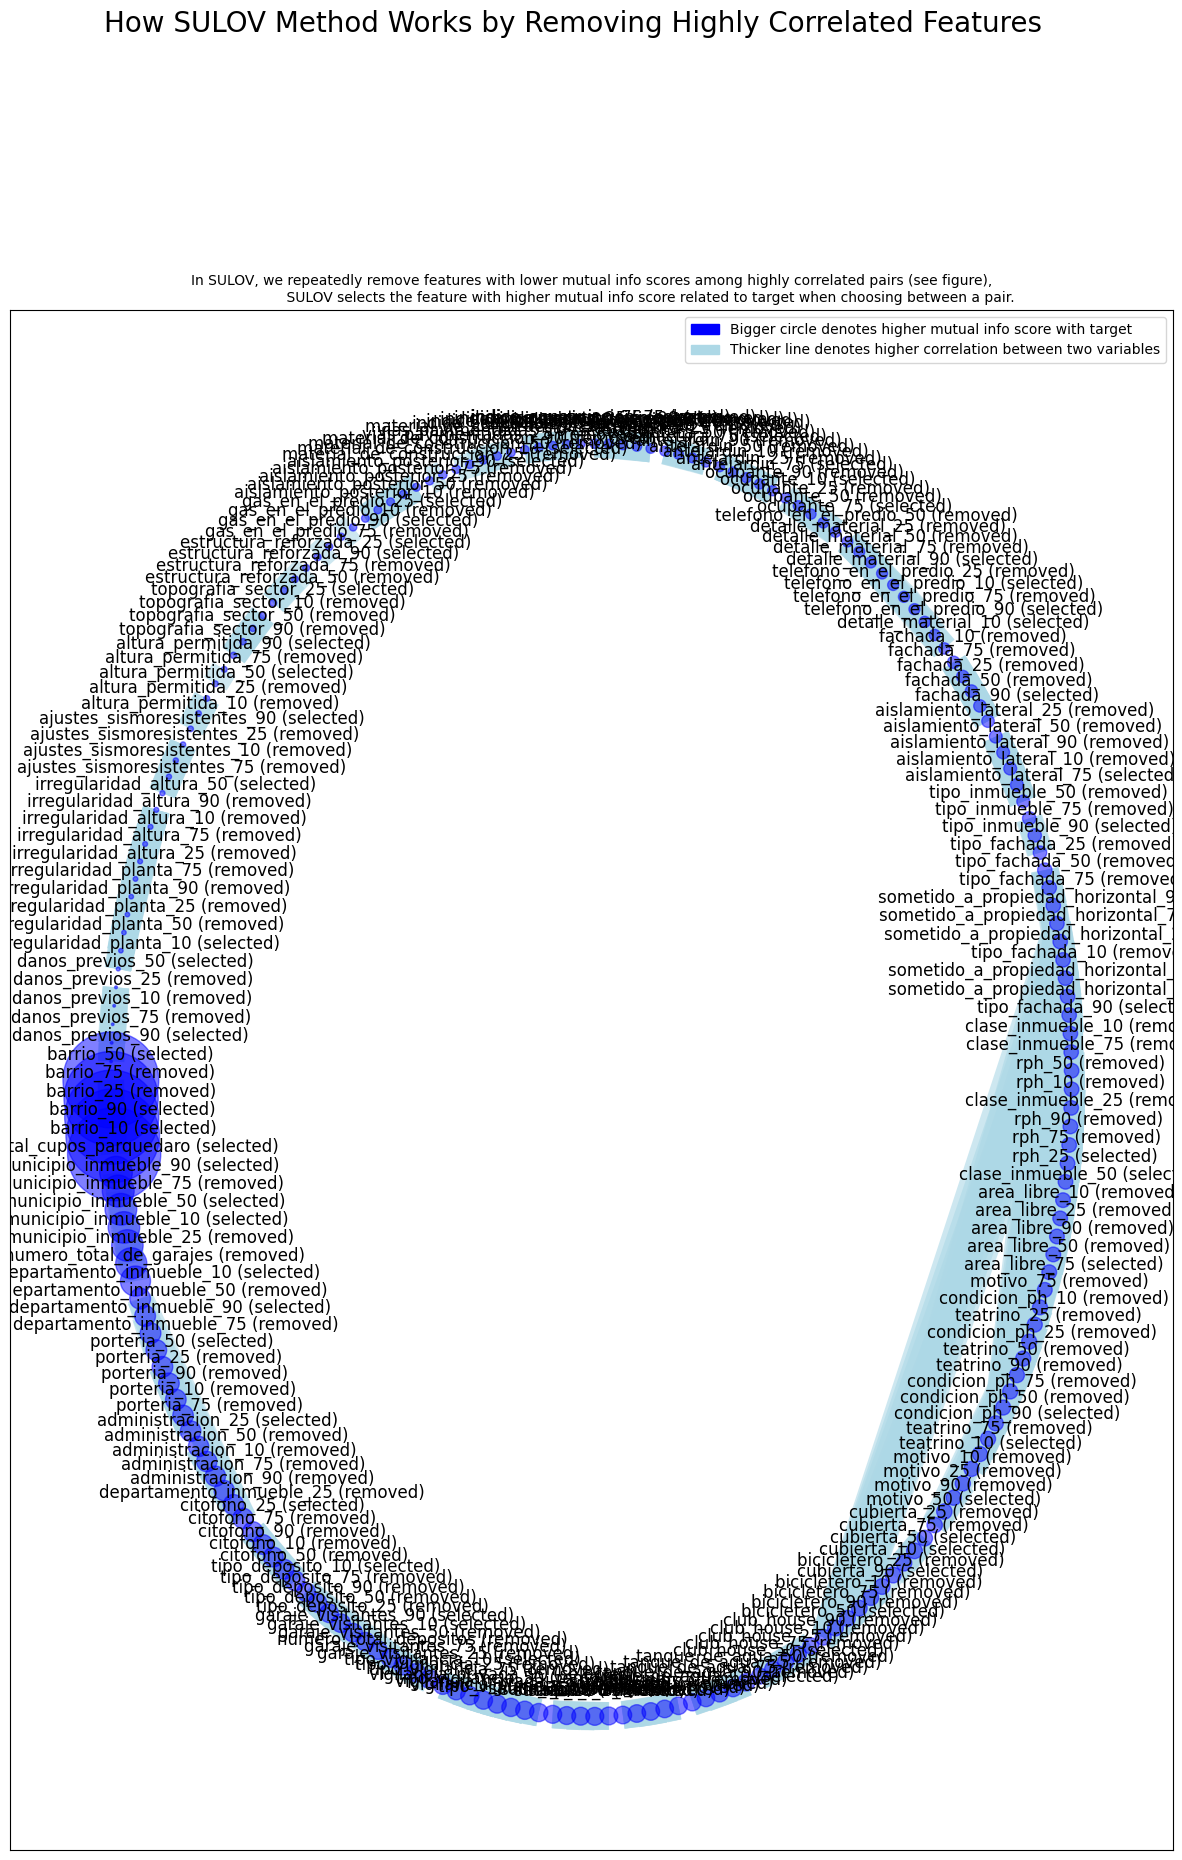

Time taken for SULOV method = 21 seconds
    Adding 0 categorical variables to reduced numeric variables  of 143
Finally 143 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 58 features per iteration...
    XGBoost version using 1.7.6 as tree method: hist
    Number of booster rounds = 100
            Time taken for regular XGBoost feature selection = 4 seconds
            Time taken for regular XGBoost feature selection = 3 seconds
            Time taken for regular XGBoost feature selection = 2 seconds
            Time taken for regular XGBoost feature selection = 2 seconds
        Selected: ['telefono_en_el_predio_90', 'ocupante_75', 'fachada_

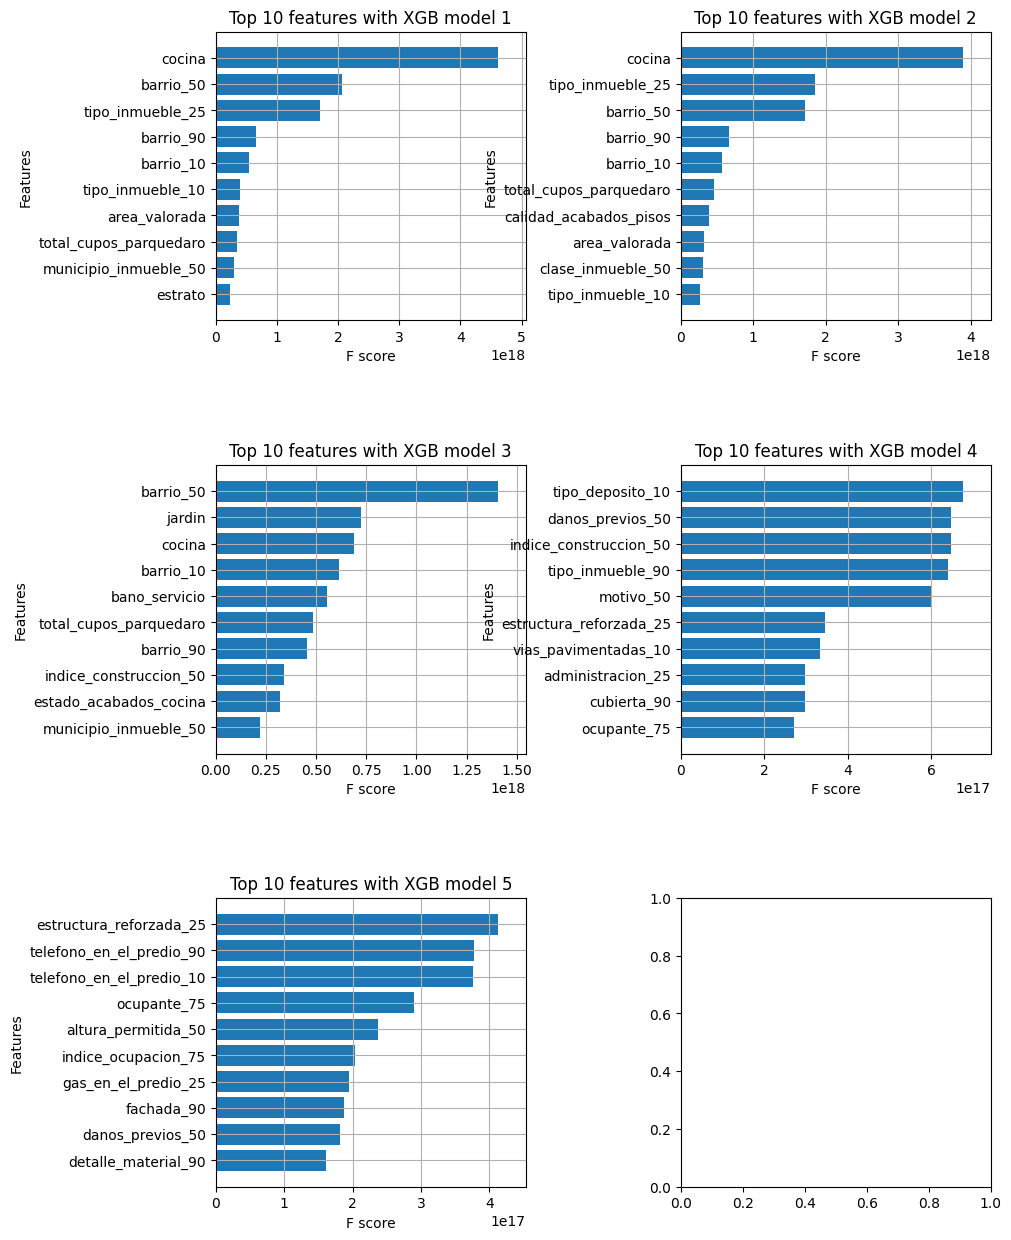

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 103 important features. Too many to print...
Total Time taken for featurewiz selection = 33 seconds
Output contains a list of 103 important features and a train dataframe
    Time taken to create entire pipeline = 34 second(s)


FeatureWiz()

In [15]:
fwiz.fit(X_train_t, y_train)

In [16]:
X_train_selected = fwiz.transform(X_train_t)
X_test_selected = fwiz.transform(X_test_t)

In [17]:
X_train_selected.shape, X_test_selected.shape

((10155, 103), (2539, 103))

In [18]:
dir(cat_econder

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_dim',
 '_get_col_name',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'cols',
 'drop_cols',
 'drop_invariant',
 'encoder_list',
 'encoding_relation',
 'feature_names_in_',
 'feature_names_out_',
 'fit',
 'fit_transform',
 'get_feature_names',
 'get_feature_names_in',
 'get_feature_names_out',
 'get_params',
 'handle_missing',
 'handle_unknown',
 'm',
 'mapping',
 'n_features_in_',
 'ordinal_encoder',
 'quantiles',
 'return_df',
 'set_para

In [49]:
variables_codificadas = list(cat_econder.encoder_list[0].mapping.keys())

In [16]:
sorted(list(X_train_selected.columns))

['administracion_25',
 'aislamiento_lateral_75',
 'aislamiento_posterior_90',
 'ajustes_sismoresistentes_50',
 'ajustes_sismoresistentes_90',
 'alamedas_10',
 'alamedas_75',
 'altura_permitida_50',
 'altura_permitida_90',
 'antejardin_75',
 'area_libre_75',
 'area_valorada',
 'balcon',
 'bano_privado',
 'bano_servicio',
 'bano_social',
 'barrio_10',
 'barrio_50',
 'barrio_90',
 'bicicletero_50',
 'calidad_acabados_banos',
 'calidad_acabados_cocina',
 'calidad_acabados_madera',
 'calidad_acabados_metal',
 'calidad_acabados_muros',
 'calidad_acabados_pisos',
 'calidad_acabados_techos',
 'ciclo_rutas_10',
 'citofono_25',
 'clase_inmueble_50',
 'clase_inmueble_90',
 'closet',
 'club_house_50',
 'cocina',
 'comedor',
 'condicion_ph_90',
 'cuarto_servicio',
 'cubierta_10',
 'cubierta_50',
 'cubierta_90',
 'danos_previos_50',
 'demanda_interes',
 'departamento_inmueble_10',
 'departamento_inmueble_90',
 'detalle_material_10',
 'detalle_material_90',
 'estado_acabados_cocina',
 'estar_habitaci

In [57]:
vars_dict = {c:c.replace('_10','').replace('_25','').replace('_50','').replace('_75','').replace('_90','') for c in X_train_selected.columns}

### Exportar modelos

In [58]:
import joblib
joblib.dump(fwiz, "../modelos/fwiz.joblib")
joblib.dump(cat_econder, "../modelos/cat_econder.joblib")
joblib.dump(vars_dict, "../modelos/vars_dict.joblib")

['../modelos/vars_dict.joblib']

### Exportar bases de train y test

In [59]:
joblib.dump(pd.concat([X_train, y_train],axis=1),"../datos/data_train.joblib")
joblib.dump(pd.concat([X_test, y_test],axis=1),"../datos/data_test.joblib")

['../datos/data_test.joblib']